### Extra trees feature scoring

In [1]:
import seaborn as sns
sns.set_style('white')
from ema_workbench.em_framework.evaluators import LHS, SOBOL, MORRIS
from ema_workbench.analysis import feature_scoring
from ema_workbench.analysis.scenario_discovery_util import RuleInductionType
from ema_workbench import save_results
from ema_workbench.util.utilities import load_results

In [2]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

In [3]:
try:
    # Only run the experiments again if data hasn't been generated yet
    results=load_results('./results_analysis1.tar.gz')
except IOError:
    with MultiprocessingEvaluator(dike_model) as evaluator:
        results = evaluator.perform_experiments(scenarios=100, policies=100)

In [4]:
#observing the simulation runs
experiments, outcomes = results

##### 'A.3_Expected Annual Damage'

In [5]:
# Calculate feature scores
scores = feature_scoring.get_ex_feature_scores(experiments, outcomes['A.3_Expected Annual Damage'],
                                      max_features=17, mode=RuleInductionType.REGRESSION, nr_trees=1000)[0]
scores

,1
0,
A.3_pfail,0.231408
A.3_DikeIncrease 0,0.152557
A.4_pfail,0.029872
A.1_Bmax,0.029081
2_RfR 0,0.027069
2_RfR 2,0.026243
A.3_Bmax,0.024588
discount rate 2,0.020190
3_RfR 1,0.019286


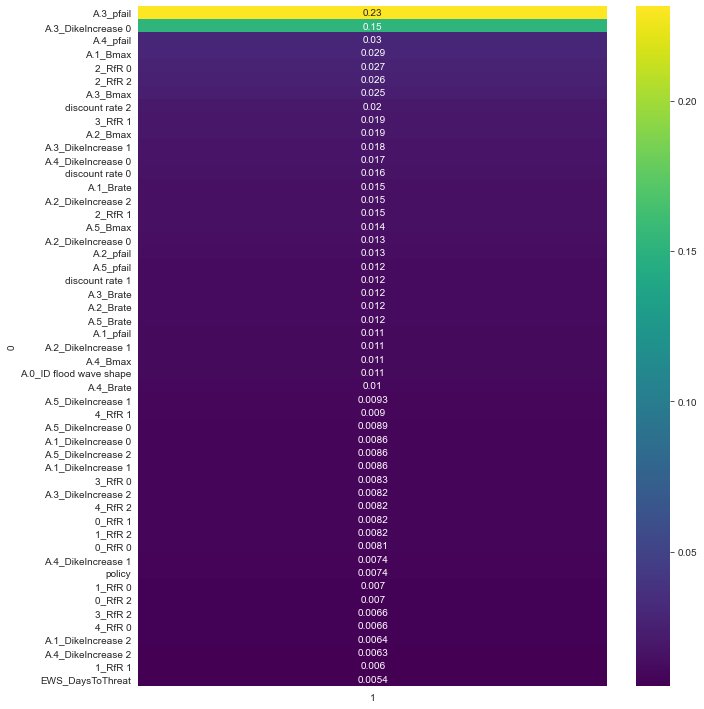

In [6]:
# Put results into heat map
fig, ax = plt.subplots(figsize=(14,14))
sns.heatmap(scores, cmap='viridis', annot=True)
fig.set_size_inches(10.5, 12.5, forward=True)
plt.show()

In [7]:
combined_scores = []
for j in range(100, experiments.shape[0], 100):
    scores = feature_scoring.get_ex_feature_scores(experiments.iloc[0:j, :],
                                                   outcomes['A.3_Expected Annual Damage'][0:j],
                                                   max_features=17,
                                                   mode=RuleInductionType.REGRESSION)[0]
    scores.columns = [j]
    combined_scores.append(scores)

In [8]:
combined_scores = pd.concat(combined_scores, axis=1, sort=True)

In [9]:
outcomes_of_interest = ['2_RfR 0', 'A.3_pfail', 'A.3_DikeIncrease 0', '2_RfR 2', 'A.1_Bmax']
combined_scores = combined_scores[combined_scores.index.isin(outcomes_of_interest)]

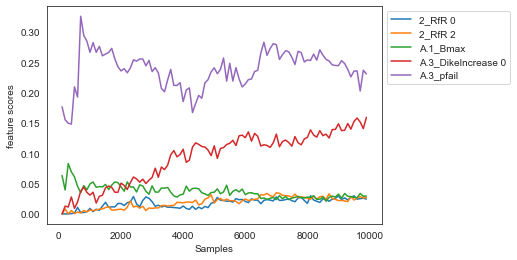

In [10]:
fig, ax = plt.subplots(1)

combined_scores.T.plot(ax=ax)
ax.legend(bbox_to_anchor=(1,1))
ax.set_xlabel('Samples')
ax.set_ylabel('feature scores')
plt.show()

#### 'Expected evacuation costs'

In [11]:
scores_EEC = feature_scoring.get_ex_feature_scores(experiments, outcomes['Expected Evacuation Costs'],
                                      max_features=17, mode=RuleInductionType.REGRESSION)[0]
scores_EEC

,1
0,
A.3_pfail,0.162068
A.3_DikeIncrease 0,0.076854
A.2_pfail,0.050076
EWS_DaysToThreat,0.038744
3_RfR 1,0.029242
A.2_DikeIncrease 0,0.028482
A.3_Bmax,0.025792
A.5_pfail,0.025734
2_RfR 0,0.024782


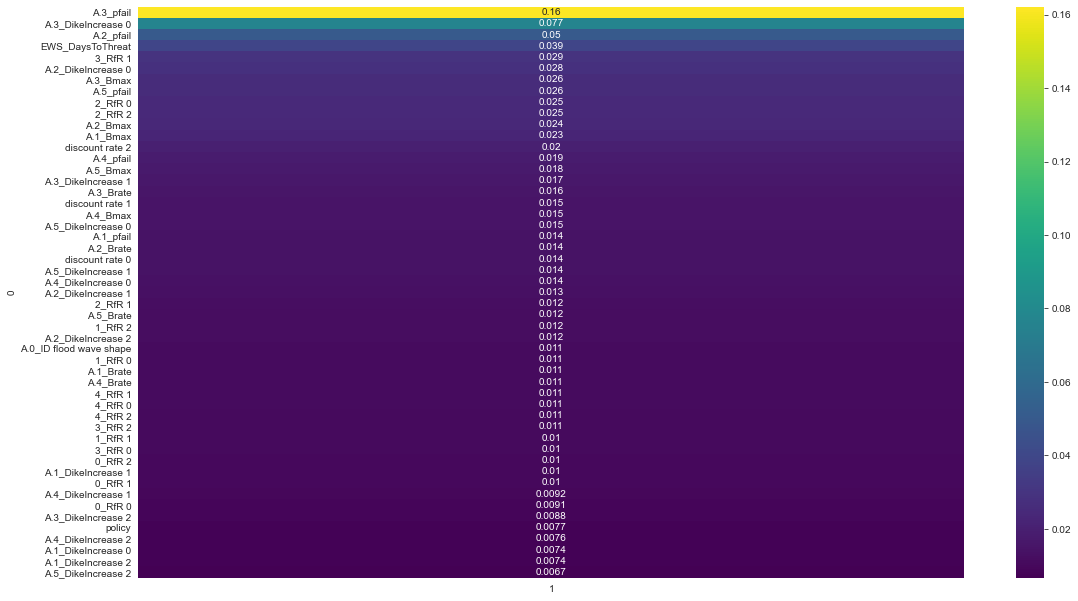

In [12]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(14,14))
sns.heatmap(scores_EEC, cmap='viridis', annot=True)
fig.set_size_inches(18.5, 10.5, forward=True)
plt.show()

In [13]:
combined_scores_EEC = []
for j in range(100, experiments.shape[0], 100):
    scores = feature_scoring.get_ex_feature_scores(experiments.iloc[0:j, :],
                                                   outcomes['Expected Evacuation Costs'][0:j],
                                                   max_features=17,
                                                   mode=RuleInductionType.REGRESSION)[0]
    scores.columns = [j]
    combined_scores_EEC.append(scores)

In [14]:
combined_scores_EEC = pd.concat(combined_scores_EEC, axis=1, sort=True)

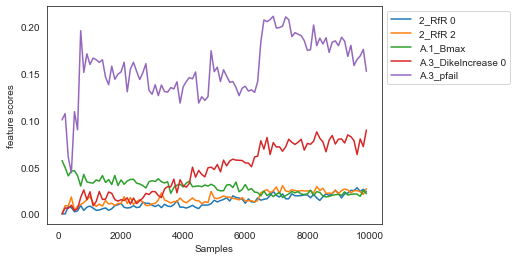

In [15]:
outcomes_of_interest = ['2_RfR 0', 'A.3_pfail', 'A.3_DikeIncrease 0', '2_RfR 2', 'A.1_Bmax']
combined_scores_EEC = combined_scores_EEC[combined_scores_EEC.index.isin(outcomes_of_interest)]
fig, ax = plt.subplots(1)
combined_scores_EEC.T.plot(ax=ax)
ax.legend(bbox_to_anchor=(1,1))
ax.set_xlabel('Samples')
ax.set_ylabel('feature scores')
plt.show()

#### "Expected Annual Damage"

In [16]:
scores_EAD = feature_scoring.get_ex_feature_scores(experiments, outcomes['A.3_Expected Annual Damage'],
                                      max_features=17, mode=RuleInductionType.REGRESSION)[0]
scores_EAD

,1
0,
A.3_pfail,0.226040
A.3_DikeIncrease 0,0.156703
A.4_pfail,0.031120
2_RfR 0,0.029404
2_RfR 2,0.026500
A.1_Bmax,0.024700
A.3_Bmax,0.023954
3_RfR 1,0.023107
discount rate 2,0.022003


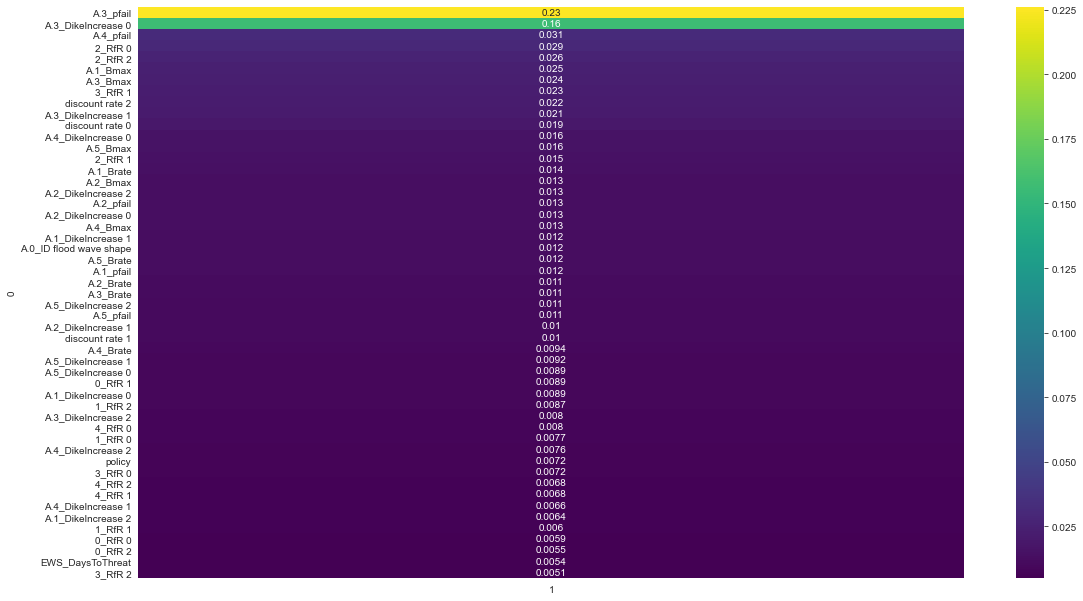

In [17]:
fig, ax = plt.subplots(figsize=(14,14))
sns.heatmap(scores_EAD, cmap='viridis', annot=True)
fig.set_size_inches(18.5, 10.5, forward=True)
plt.show()

#### 'Expected number of deaths'

In [18]:
scores_ENoD = feature_scoring.get_ex_feature_scores(experiments, outcomes['A.3_Expected Annual Damage'],
                                      max_features=17, mode=RuleInductionType.REGRESSION)[0]
scores_ENoD

,1
0,
A.3_pfail,0.231571
A.3_DikeIncrease 0,0.156817
2_RfR 0,0.030347
2_RfR 2,0.029856
A.1_Bmax,0.028516
A.4_pfail,0.027110
A.3_Bmax,0.022137
A.2_pfail,0.020022
A.2_DikeIncrease 0,0.019305


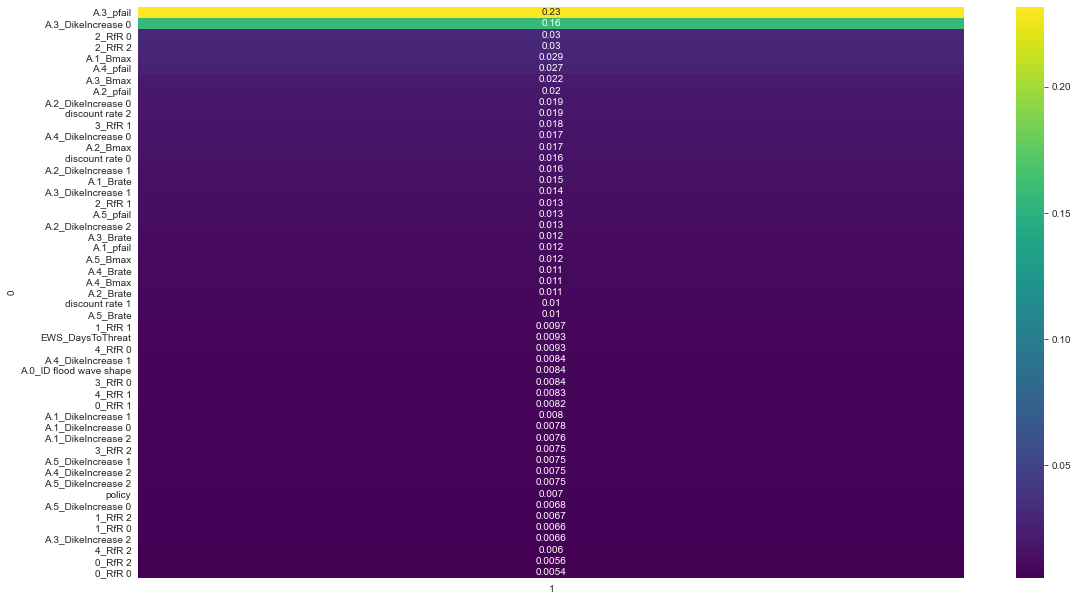

In [19]:
fig, ax = plt.subplots(figsize=(14,14))
sns.heatmap(scores_ENoD, cmap='viridis', annot=True)
fig.set_size_inches(18.5, 10.5, forward=True)
plt.show()